                     Accuracy
Logistic Regression  0.973684
KNN (k=5)            0.947368
Naive Bayes          0.973684
Decision Tree        0.947368


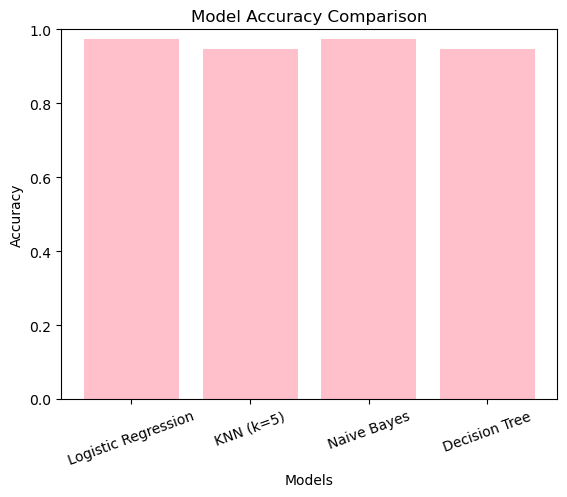

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42)
}

results = {}

for model_name, model in models.items():
    if model_name in ["Logistic Regression", "KNN (k=5)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results[model_name] = accuracy_score(y_test, y_pred)

comparison_df = pd.DataFrame.from_dict(
    results, orient='index', columns=['Accuracy']
)
print(comparison_df)
plt.figure()
plt.bar(comparison_df.index, comparison_df["Accuracy"],color="pink")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=20)
plt.ylim(0, 1)
plt.show()